In [20]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from Unet import *
from train_Unet import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


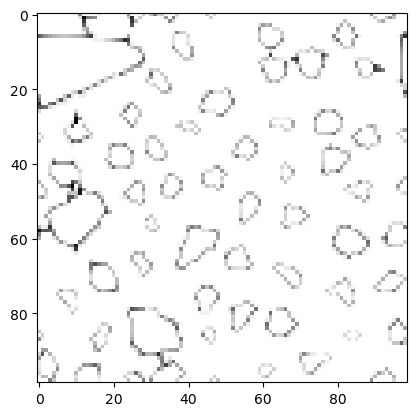

In [25]:
data = dataset()
imgs, label = data.__getitem__(3)
loaders = get_loaders_manual(data, 16)
plt.imshow(imgs[1,0], cmap='Greys')

In [8]:
args = {'lr' : 0.00001, 'epochs' : 200, 'dev' : dev, 'name' : 'Simple_Unet'}

In [6]:
unet = UNet()

In [ ]:
unet = load_network(unet, args['name'], args)

In [9]:
losses_train, losses_val = train(unet, loaders, args)

c:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 0 batch: 0 mean train loss:  87592.1718750000


KeyboardInterrupt: 

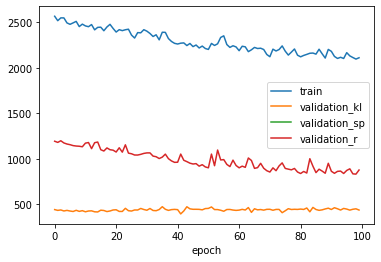

In [28]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation_kl', 'validation_sp', 'validation_r'])

In [24]:
train_data = next(iter(loaders['train']))[0].to(args['dev'])

In [8]:
unet = unet.to(args['dev'])

In [9]:
y = unet(train_data)